# Lista 10 - sieci przepływowe #

### <b> Zadanie nr 1 </b> ###
Zaimplementuj algorytm Edmondsa-Karpa dla sieci przepływowej zadanej w pliku. Zaproponuj format da-
nych w pliku. Wyświetl sieci rezydualne w każdym kroku algorytmu.

Zadbaj o to, żeby sieć była wyświetlana przejrzyście - z wyraźnie zaznaczonymi kierunkami przepływu, bez
losowości w pozycjach wierzchołków itd.

In [1]:
#code below

### <b>Zadanie nr 2</b> ###

Zaimplementuj algorytm Forda-Fulkersona dla sieci przepływowej jak w poprzednim zadaniu. Umożliw podawanie ścieżek powiększającyh przepływ (podaje użytkownik – w każdym kroku algorytmu).

Zadbaj o to, żeby sieć była wyświetlana przejrzyście - z wyraźnie zaznaczonymi kierunkami przepływu, bez losowości w pozycjach wierzchołków itd.

In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
edges = [
    (0, 1, 3),
    (1, 2, 4),
    (1, 3, 3),
    (0, 2, 5),
    (2, 3, 7),
    (3, 4, 6),
    (3, 5, 5),
    (4, 6, 4),
    (5, 6, 7),
    (6, 7, 8),
    (5, 7, 5),
]

In [4]:
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

In [37]:
size = 100
nodes = list(G.nodes())

pos = {}
x = 1
y = 1
pos[nodes[0]] = [x, y]

for node in nodes[1:-1]:
    if int(node) % 2:
        x += .1
    pos[node] = [x, y + (-1) ** int(node) * .1]

pos[nodes[-1]] = [ pos[nodes[-2]][0] + .1, pos[nodes[0]][-1] ]

In [29]:
def plot_net(flows):
    cmap = []
    labels = {}

    for edge in flows:
        f = flows[edge]['flow']
        w = flows[edge]['weight']
        labels[edge] = str(f) + '/' + str(w)
        if w == f:
            cmap.append('red')
        elif f:
            cmap.append('orange')
        else:
            cmap.append('black')

    nx.draw(
        G,
        pos=pos,
        with_labels=True
        )

    nx.draw_networkx_edge_labels(
        G,
        pos=pos,
        edge_labels=labels,
        )

    nx.draw_networkx_edges(
        G,
        pos=pos,
        edge_color=cmap
    )
    plt.show()

In [30]:
def get_path_from_user():
    path = input('Podaj ścieżkę:')
    if path == 'q':
        return path
    path.replace(' ', '')   
    path = [int(n) for n in path.split(',')]

    return path

In [34]:
def check_adj_flows(flws, s, t):
    f = 0  # flow
    c = 0  # capacity

    # sprawdzenie czy może coś wypłynąć z wierzchołka początkowego
    for edge in flws:
        if edge[0] == s:
            f += flws[edge]['flow']
            c += flws[edge]['weight']
    
    if f == c:
        return f

    f, c = 0,  0

    # sprawdzenie czy może coś wpłynąć do wierzchołka końcowego
    for edge in flws:
        if edge[1] == s:
            f += flws[edge]['flow']
            c += flws[edge]['weight']

    if f == c:
        return f
    else: 
        return


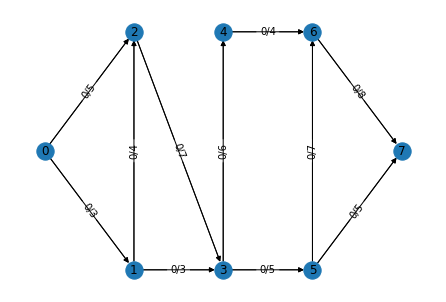

Maksymalny przepływ: None


In [39]:
def ffa(g, s, t):
    """
    Algorytm forda-focusa
    :param g: graf
    :param s: 'kran' (węzeł początkowy)
    :param t: 'zlew' (węzeł końcowy) 
    :return :
    """
    flows = {}

    flows = {}
    for edge in (g.edges()):
        flows[edge] = {
            'flow' : 0,
            'weight': G[edge[0]][edge[1]]['weight']
            }

    plot_net(flows)
    path = get_path_from_user()

    while path != 'q':
        path_edges = []
        weights = []
        for n in range(1, len(path)):
            temp_edge = (path[n-1], path[n])
            path_edges.append(temp_edge)
            weights.append(flows[temp_edge]['weight'] - flows[temp_edge]['flow'])
        for edge in path_edges:
            flows[edge]['flow'] += min(weights)

        plot_net(flows)

        max_flow = check_adj_flows(flows, s, t)

        if max_flow:
            return max_flow
        

        path = get_path_from_user()

        if path[0] != s or path[-1] != t:
            return 'wrong input'

            
print('Maksymalny przepływ:', ffa(G, 0, 7))